In [1]:
from preprocessed_mnist import load_dataset
import matplotlib.pyplot as plt

Using TensorFlow backend.


In [2]:
import numpy as np
import tensorflow as tf

In [3]:
X_train, y_train, X_val, y_val, X_test, y_test = load_dataset()
print(X_train.shape, y_train.shape)

(50000, 28, 28) (50000,)


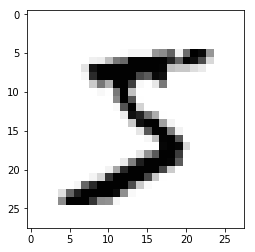

In [4]:
%matplotlib inline
plt.imshow(X_train[0], cmap="Greys");

# Recommended pipeline:

1. Begin with logistic regression from the previous assignment to classify some number against others (e.g. zero vs nonzero)
2. Generalize it to multiclass logistic regression. Either try to remember the week 1 lectures or google it.
3. Instead of a weights vector you'll have to use a matrix with `shape=(features, classes)` softmax (exp over sum of exps) can implemented manually or as `tf.nn.softmax`
4. probably better to use STOCHASTIC gradient descent (minibatch) in which case sample should probably be shuffled (or use random subsamples on each iteration)



# Add a hidden layer. Now your logistic regression uses hidden neurons instead of inputs.
1. Hidden layer uses the same math as output layer (ex-logistic regression), but uses some nonlinearity (sigmoid) instead of softmax
2. You need to train both layers, not just output layer :)
3. Do not initialize layers with zeros (due to symmetry effects). A gaussian noize with small sigma will do.
4. 50 hidden neurons and a sigmoid nonlinearity will do for a start. Many ways to improve here.
5. In an ideal case this totals to 2 .dot's, 1 softmax and 1 sigmoid

# Review criteria
1. The solution runs in the course environment. This is a must, for sake of the fellow learner, make you work not require additional effort to assess.
2. The solution runs in less than 5 minutes on the Coursera server (or a single CPU). There is no need to overengineer.
3. You correctly implement an MLP in tensorflow. Usage of external high-level libraries such as keras is forbidden.
4. The solution has a clear training part and an evaluation part where the accuracy on the test dataset is assessed.
5. You don't use the test dataset for training in any way. Do not use any datasets other than the one provided via week2/mnist.py
6. You have a plot with train loss and test losses as a function of the iteration number
7. To pass, the accuracy must be at least 95%, to get the full points, 98%

# Flatten image for classification

In [5]:
n_samples = len(X_train)
X_train = X_train.reshape((n_samples, -1))
print(X_train.shape)

(50000, 784)


In [6]:
n_samples = len(X_test)
X_test = X_test.reshape((n_samples, -1))
print(X_test.shape)

(10000, 784)


In [7]:
from sklearn.preprocessing import OneHotEncoder
onehot_encoder = OneHotEncoder(sparse=False)
y_train = y_train.reshape(len(y_train), 1)
y_train = onehot_encoder.fit_transform(y_train)
y_test = y_test.reshape(len(y_test), 1)
y_test = onehot_encoder.fit_transform(y_test)

# Phase 1: assemble your graph
1. Define placeholders for input and output
2. Define the weights
3. Define the inference model
4. Define loss function
5. Define optimizer

In [8]:
num_classes = len(np.unique(y_train))

In [9]:
with tf.name_scope('data'):
    X_input = tf.placeholder (dtype = tf.float32, shape = [None,784], name = 'input_data')
    y_input = tf.placeholder (dtype = tf.float32, shape= [None,10], name = 'labels')

In [10]:
with tf.name_scope('variables'):
    w1 = tf.Variable(tf.random_normal(shape = [784,256],dtype = tf.float32,name='layer1_weights'))
    b1 = tf.Variable(0.,dtype=tf.float32,name ='layer1_bias')
    w2 = tf.Variable(tf.random_normal(shape = [256,10],dtype = tf.float32,name='layer2_weights'))
    b2 = tf.Variable(0.,dtype=tf.float32,name ='layer2_bias')

In [11]:
with tf.name_scope('transformations'):
    y1 = tf.nn.sigmoid(tf.matmul(X_input,w1) + b1)
    y2 = tf.nn.softmax(tf.matmul(y1, w2) + b2)

In [12]:
with tf.name_scope('loss'):
    loss = tf.reduce_mean(-tf.reduce_sum(y_input * tf.log(y2), reduction_indices=[1]))

In [13]:
with tf.name_scope('train'):
    optimiser = tf.train.GradientDescentOptimizer(0.5).minimize(loss)

# Need to improve batch process

In [ ]:
temp = []
end = 0
tmp_data= []
tmp_labels = []
def next_batch(data,labels, batch_size):
    """Return the next `batch_size` examples from this data set."""
    global temp, end, tmp_data, tmp_labels
    num_examples = len(labels)
    if(end == 0 or end- batch_size>= num_examples):
        perm = np.arange(num_examples)
        np.random.shuffle(perm)
        temp = perm
        tmp_data = data[perm]
        tmp_labels = labels[perm]
        start = 0
        end = batch_size
    else:
        start = end
        end = start+batch_size
    return tmp_data[start:end], tmp_labels[start:end]

# With this setup I get 95% on my computer

In [ ]:
with tf.Session() as sess:
    all_variables = tf.global_variables_initializer()
    sess.run(all_variables)
    for step in range(20000):
        batch_xs, batch_ys = next_batch(X_train, y_train, batch_size=150)
        sess.run(optimiser, feed_dict={X_input: batch_xs, y_input: batch_ys})
        if step%1500==0:
            print(f'loss in training: {sess.run(loss,feed_dict={X_input: batch_xs, y_input: batch_ys})}')
            
    correct_prediction = tf.equal(tf.argmax(y2,1), tf.argmax(y_input,1))
    accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))
    print('Accuracy in test data : {}'.format(sess.run(accuracy, feed_dict={X_input: X_test, y_input: y_test})))

loss in training: 13.966697692871094
